### <b>Maven Halloween Challenge</b>

Find <b>3 treats</b> that will guarentee trick-or-treaters of all tastes find something they'll love.

#### Candy Dataset Overview

Data was gathered on 85 different brands of candy, here's how it breaks down:

<b>Flavour Profiles</b>

A candy may have multiple flavours and it's noted whether each contains:
* Chocolate
* Caramel
* Peanuts or Almonds
* Fruit
* Nougat
* Crisped Rice Wafer

<b>Candy Formats</b>

The Candies come in various formats, they were organized into:
* Bar
* Hard
* Pluribus (many in a package)

<b>Other Important Stats</b>

* Win Percentage
    - How often a candy wins based on 269,000 head-to-head match-ups. 
    - This gives us a sense of how popular each candy is.
* Price Percentage
    - The unit price percentile compared to the rest of the set. 
    - A higher percentile means it's more expensive compared to other candies in the set.
    

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [223]:
candy = pd.read_csv("candy-data.csv")

In [224]:
candy.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 13.9 KB


In [229]:
candy.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,47.864705,46.888235,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,28.277787,28.573962,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,1.100000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,25.500000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,46.500000,46.500000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,73.199999,65.100002,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,98.799998,97.600001,84.180290


In [227]:
# noticed sugar and price were still in decimal percentages
candy["sugarpercent"] = candy["sugarpercent"] * 100
candy["pricepercent"] = candy["pricepercent"] * 100

In [228]:
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,73.199999,86.000001,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,60.399997,51.099998,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,1.100000,11.600000,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,1.100000,51.099998,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,90.600002,51.099998,52.341465


### Setting the Spooky Halloween Theme

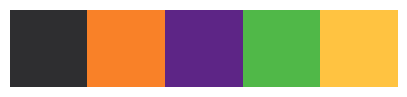

In [230]:
color_hex = [ "#2E2E30", "#F98128", "#5D2586", "#50B848", "#FFC341"]

# color examples
sns.palplot(color_hex)
plt.xticks(ticks=[])
sns.despine(bottom = True, left = True)

# set the theme
sns.set_palette(color_hex)

### Step 1: Explore which flavours are popular

In [231]:
flavour_names = list(candy.columns.values[1:7])
flavour_names

['chocolate',
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer']

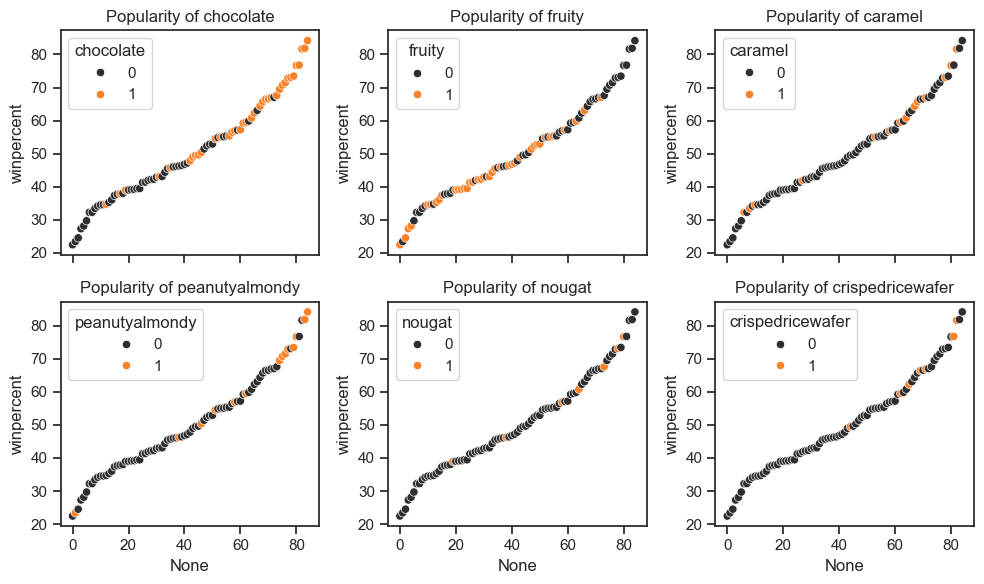

In [232]:
fig, ax = plt.subplots(2, 3, sharex="all", figsize=(10, 6))

ax = ax.flatten()

for i, axis in zip(flavour_names, ax):
    sns.scatterplot(data=candy.sort_values(by="winpercent"),
                    x=candy.index,
                    y="winpercent",
                    hue=i,
                    ax=axis)
    axis.set_title(f"Popularity of {i}")

plt.tight_layout()
plt.show()

From these plots we can see that <b>chocolate</b> and <b>peanutyalmondy</b> flavours are the most popular treats.

<b>Peanutyalmondy</b> flavours have a distinct presence in the top percentile of candies.

#### Refine plots to highlight flavour conclusions

* Plot 1: Consumer preference towards peanuty/almondy flavours
* Plot 2: The identity of the top 10 snacks
* Plot 3: The price percentile of the top 10 snacks

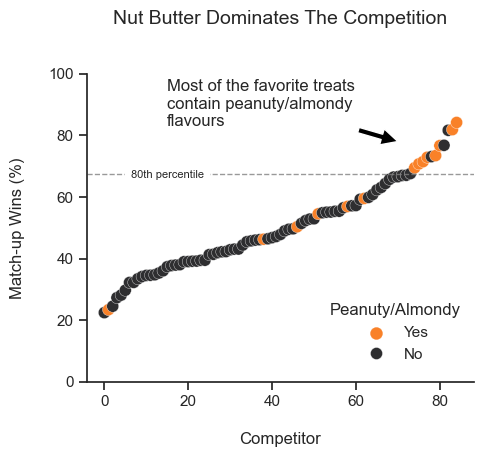

In [130]:
sns.set_palette(color_hex)

fig, ax = plt.subplots(figsize = (5,4))

sns.scatterplot(data = candy.sort_values(by = "winpercent"),
            x = candy.index,
            y = "winpercent",
            hue = "peanutyalmondy",
            s = 75,
            linewidth=0.25)

# adjust axis and titles
ax.set_ylim(0, 100)
ax.set_ylabel("Match-up Wins (%)\n", fontsize = 12)
ax.set_xlabel("\nCompetitor", fontsize = 12)
ax.set_title("Nut Butter Dominates The Competition\n\n", fontsize = 14)

# customize legend title and labels
ax.legend(title="Peanuty/Almondy", labels = ['Yes', 'No'], frameon=False, bbox_to_anchor = (1,0.3))
legend = ax.get_legend()
legend.legend_handles [0].set_color(color_hex[1])
legend.legend_handles [1].set_color(color_hex[0])

# adds a horizontal line at top 20 percent
ax.axhline(y=(max(candy["winpercent"])*0.80), linewidth=1, color='grey', ls = "--", alpha = 0.8);

# add text annotation
ax.annotate('Most of the favorite treats\ncontain peanuty/almondy\nflavours', xy=(70, 78), xytext=(15, 83),
            arrowprops=dict(facecolor='black'))

plt.text(15, (max(candy["winpercent"])*0.80), '80th percentile', fontsize=8, va='center', ha='center', backgroundcolor='w')

sns.despine()

C:\Users\kiesw\AppData\Local\Temp\ipykernel_68876\2086603835.py:3: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(data = candy.sort_values(by = "winpercent", ascending = False).head(10),


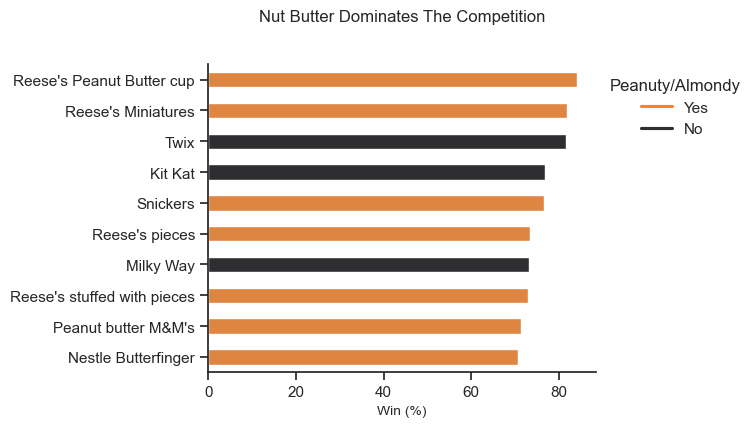

In [131]:
fig, ax = plt.subplots(figsize = (5,4))

sns.barplot(data = candy.sort_values(by = "winpercent", ascending = False).head(10),
            y = "competitorname",
            x = "winpercent",
            palette = color_hex,
            hue = "peanutyalmondy",
            width = 0.5)

ax.set_ylabel("")
ax.set_xlabel("Win (%)", fontsize = 10)
ax.set_title("Nut Butter Dominates The Competition\n\n", fontsize = 12)

# customize legend title and labels
ax.legend(title="Peanuty/Almondy", labels = ['Yes', 'No'], frameon=False, bbox_to_anchor = (1,1))
legend = ax.get_legend()
legend.legend_handles [0].set_color(color_hex[1])
legend.legend_handles [1].set_color(color_hex[0])

sns.despine();

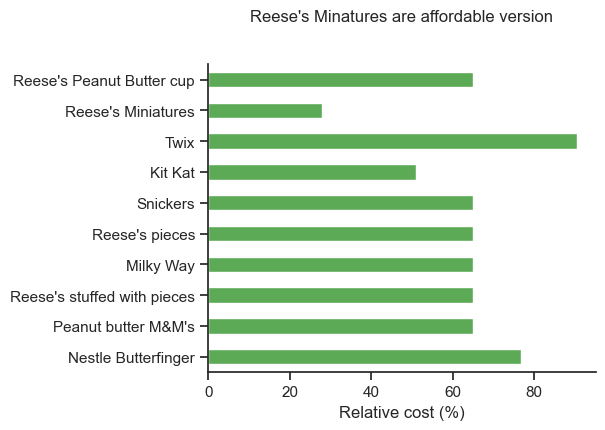

In [172]:
fig, ax = plt.subplots(figsize = (5,4))

sns.barplot(data = candy.sort_values(by = "winpercent", ascending = False).head(10),
            y = "competitorname",
            x = "pricepercent",
            color = color_hex[3],
            width = 0.5,
            legend = False)

ax.set_ylabel("")
ax.set_xlabel("Relative cost (%)")
ax.set_title("Reese's Minatures are affordable version\n\n", fontsize = 12)


sns.despine();

### Step 2: Explore the preferred candy formats

In [233]:
format_types = list(candy.columns.values[7:10])
format_types

['hard', 'bar', 'pluribus']

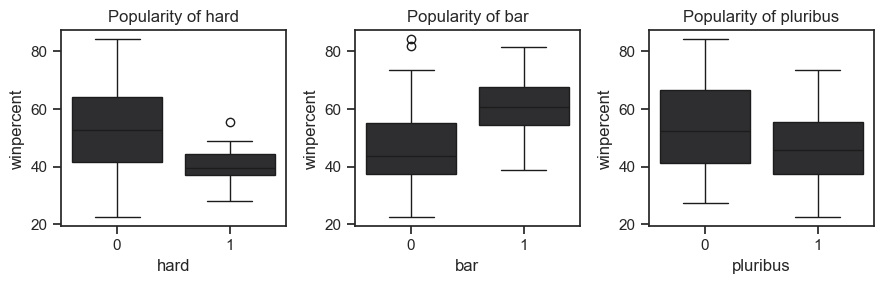

In [234]:
fig, ax = plt.subplots(1, 3, sharex="all", figsize=(9, 3))

ax = ax.flatten()

for i, axis in zip(format_types, ax):
    sns.boxplot(data=candy.sort_values(by="winpercent"),
                    x=i,
                    y="winpercent",
                    ax=axis)
    axis.set_title(f"Popularity of {i}")

plt.tight_layout()
plt.show()

Consumers surveyed prefer <b>non-hard, bar, single item</b> candies.

### Filter dataframe to reflect candy format preferences

In [235]:
(candy.query(
    "(hard == 0) & (bar == 1) & (pluribus == 0)")
    .sort_values(
        by = "winpercent", 
        ascending = False)
    .head(5))

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
79,Twix,1,0,1,0,0,1,0,1,0,54.600000,90.600002,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,31.299999,51.099998,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,54.600000,65.100002,76.673782
36,Milky Way,1,0,1,0,1,0,0,1,0,60.399997,65.100002,73.099556
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,60.399997,76.700002,70.735641


<b>Twix</b> is the most popular candy within these format preferences.

<b>Kit Kat's</b> are the more affordable option at 39% lower price percentile.

Both of these snacks are already encompassed within the Top 10 plot in the previous section.

### Step 3: Something entirely different

The previous two recommendations are both chocolatey treats.

We should include something for non-chocolate lovers.

In [219]:
(candy.query("chocolate == 0 & peanutyalmondy == 0").sort_values(
        by = "winpercent", 
        ascending = False)
    .head(5))

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
68,Starburst,0,1,0,0,0,0,0,0,1,15.099999,22.000000,67.037628
60,Skittles original,0,1,0,0,0,0,0,0,1,94.099998,22.000000,63.085140
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,6.900000,11.600000,59.863998
18,Haribo Gold Bears,0,1,0,0,0,0,0,0,1,46.500000,46.500000,57.119740
41,Nerds,0,1,0,0,0,0,1,0,1,84.799999,32.499999,55.354046


The top 5 non-chocolate and non-peanutyalmondy candies are <B>fruity</b> flavoured.

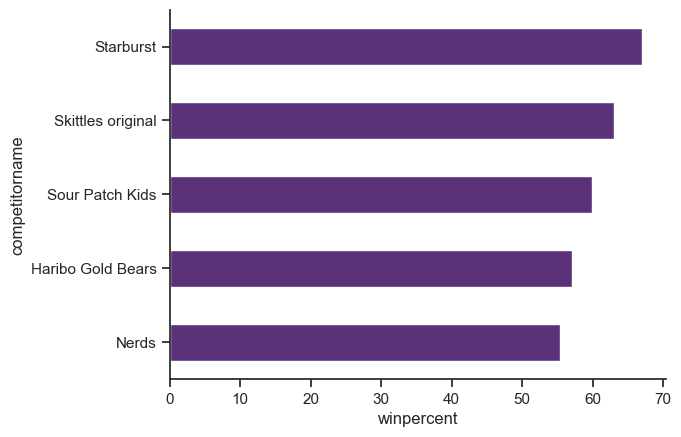

In [246]:
sns.barplot(data = candy.query("peanutyalmondy == 0 & chocolate == 0").sort_values(by = "winpercent", ascending = False).head(5),
            y = "competitorname",
            x = "winpercent",
            color = color_hex[2],
            width = 0.5)

sns.despine()

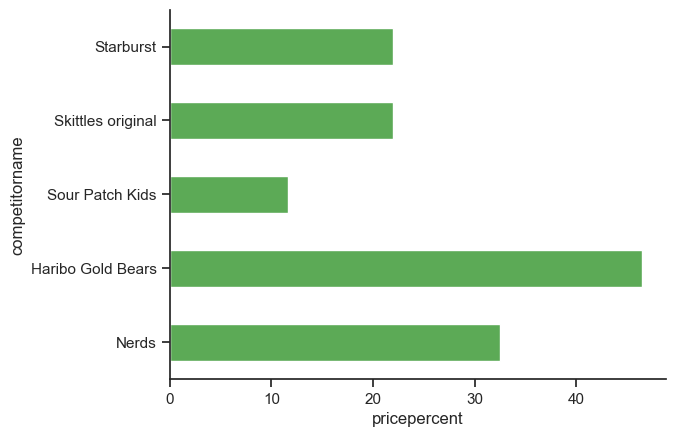

In [250]:
sns.barplot(data = candy.query("peanutyalmondy == 0 & chocolate == 0").sort_values(by = "winpercent", ascending = False).head(5),
            y = "competitorname",
            x = "pricepercent",
            color = color_hex[3],
            width = 0.5)

sns.despine()

<b>Starbust</b> is the most popular non-chocolate non-peanutyalmondy candy.

<b>Sour Patch Kids</b> are the more affordable option at a 10% lower price percentile.

### Recommendations

<b>Treat 1:</b> Must include peanutyalmondy flavours.

<b>Treat 2:</b> Should be the most popular non-hard, bar, single item.

<b>Treat 3:</b> Should be something fruity.

### Designing a one-page report to display the story

C:\Users\kiesw\AppData\Local\Temp\ipykernel_68876\3072829155.py:52: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax2 = sns.barplot(data = candy.sort_values(by = "winpercent", ascending = False).head(10),


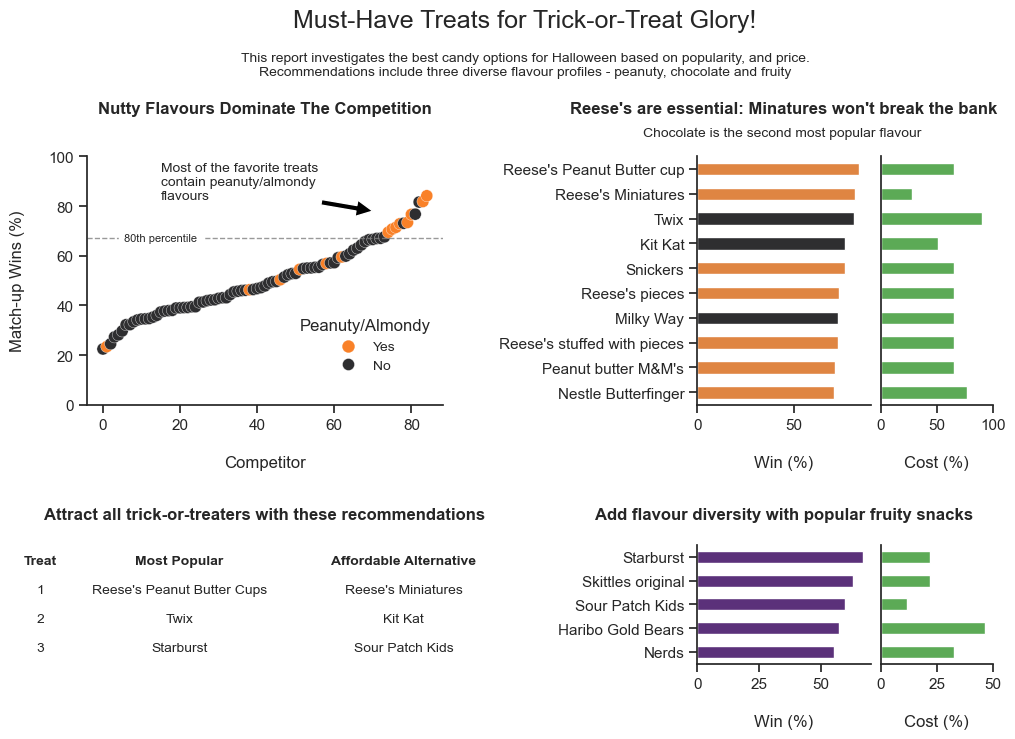

In [580]:
### Setting up the report

fig = plt.figure(figsize = (11.69,8.27))

gs = gridspec.GridSpec(ncols = 15, nrows = 10)

fig.suptitle("Must-Have Treats for Trick-or-Treat Glory!",
             fontsize = 18)

fig.text(0.5, 0.90,
         "This report investigates the best candy options for Halloween based on popularity, and price.\n"
         "Recommendations include three diverse flavour profiles - peanuty, chocolate and fruity",
         ha='center', fontsize=10)

### Subplot 1 - Peanut Butter

ax1 = fig.add_subplot(gs[1:5, 0:6])

ax1 = sns.scatterplot(data = candy.sort_values(by = "winpercent"),
            x = candy.index,
            y = "winpercent",
            hue = "peanutyalmondy",
            s = 75,
            linewidth=0.25)

# adjust axis and titles
ax1.set_ylim(0, 100)
ax1.set_ylabel("Match-up Wins (%)\n", fontsize = 12)
ax1.set_xlabel("\nCompetitor", fontsize = 12)
ax1.set_title("Nutty Flavours Dominate The Competition\n\n" , weight = "bold")

# customize legend title and labels
ax1.legend(title="Peanuty/Almondy", labels = ['Yes', 'No'], frameon=False, bbox_to_anchor = (1,0.4), fontsize = 10)
legend = ax1.get_legend()
legend.legend_handles [0].set_color(color_hex[1])
legend.legend_handles [1].set_color(color_hex[0])

# adds a horizontal line at top 20 percent
ax1.axhline(y=(max(candy["winpercent"])*0.80), linewidth=1, color='grey', ls = "--", alpha = 0.8);

# add text annotation
ax1.annotate('Most of the favorite treats\ncontain peanuty/almondy\nflavours', xy=(70, 78), xytext=(15, 83),
            arrowprops=dict(facecolor='black'), fontsize = 10)

plt.text(15, (max(candy["winpercent"])*0.80), '80th percentile', fontsize=8, va='center', ha='center', backgroundcolor='w')

sns.despine()

### Subplot 2 - Top 10 overall
ax2 = fig.add_subplot(gs[1:5, 10:13])

ax2 = sns.barplot(data = candy.sort_values(by = "winpercent", ascending = False).head(10),
            y = "competitorname",
            x = "winpercent",
            palette = color_hex,
            hue = "peanutyalmondy",
            width = 0.5,
            legend = False
            )

ax2.set_ylabel("")
ax2.set_xlim((0, 90))
ax2.set_xlabel("\nWin (%)", fontsize = 12)
ax2.set_title("Reese's are essential: Minatures won't break the bank\n\n" , weight = "bold")

fig.text(0.72, 0.81,
         "Chocolate is the second most popular flavour\n",
         ha='center', fontsize=10)

sns.despine();

### subplot 3 - price comparison

ax3 = fig.add_subplot(gs[1:5, 13:15])

ax3 = sns.barplot(data = candy.sort_values(by = "winpercent", ascending = False).head(10),
            y = "competitorname",
            x = "pricepercent",
            color = color_hex[3],
            width = 0.5,
            legend = False)

ax3.set_ylabel("")
ax3.set_xlim((0, 100))
ax3.set_xlabel("\nCost (%)", fontsize = 12)

plt.yticks(ticks=[], labels = [])

sns.despine();

### subplot 4 - Fruity snacks

ax4 = fig.add_subplot(gs[7:9, 10:13])

ax4 = sns.barplot(data = candy.query("peanutyalmondy == 0 & chocolate == 0").sort_values(by = "winpercent", ascending = False).head(5),
            y = "competitorname",
            x = "winpercent",
            color = color_hex[2],
            width = 0.5,
            legend = False)

ax4.set_ylabel("")
ax4.set_xlim((0, 70))

ax4.set_xlabel("\nWin (%)", fontsize = 12)
ax4.set_title("Add flavour diversity with popular fruity snacks\n" , weight = "bold")
sns.despine();

### subplot 5 - price comparison non-chocolate/PB

ax5 = fig.add_subplot(gs[7:9, 13:15])

ax5 = sns.barplot(data = candy.query("peanutyalmondy == 0 & chocolate == 0").sort_values(by = "winpercent", ascending = False).head(5),
            y = "competitorname",
            x = "pricepercent",
            color = color_hex[3],
            width = 0.5,
            legend = False)

ax5.set_ylabel("")
ax5.set_xlim((0, 50))
ax5.set_xlabel("\nCost (%)", fontsize = 12)

plt.yticks(ticks=[], labels = [])

sns.despine();

## recommendations

ax6 = fig.add_subplot(gs[7:9, 0:6])

ax6.set_title("Attract all trick-or-treaters with these recommendations\n", weight='bold')

recommedations = [
    ["Treat", "Most Popular", "Affordable Alternative"],
    ["1", "Reese's Peanut Butter Cups", "Reese's Miniatures"],
    ["2", "Twix", "Kit Kat"],
    ["3", "Starburst", "Sour Patch Kids"]
]

table = ax6.table(recommedations, 
                  loc='center', 
                  cellLoc='center', 
                  colWidths=[0.1, 0.42, 0.42], 
                  fontsize = 12)

table.scale(1.5, 1.75)

for key, cell in table.get_celld().items():
    cell.set_edgecolor('none')

for (row, column), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold')

ax6.set_axis_off()